<a href="https://colab.research.google.com/github/almogtovim/Pytorch_projects/blob/main/MNIST_handwrite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision

In [2]:
import torch 
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms


In [21]:
transform = transforms.Compose([transforms.Resize((28,28)), transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

training_dataset = datasets.MNIST(root = './data', train=True, download = True, transform=transform )
training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=100, shuffle=True)

validation_dataset = datasets.MNIST(root = './data', train=True, download = True, transform=transform )
validation_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=100, shuffle=False)

In [4]:
def img_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  # print(image.shape)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5)) 
  image = image.clip(0, 1)
  return image

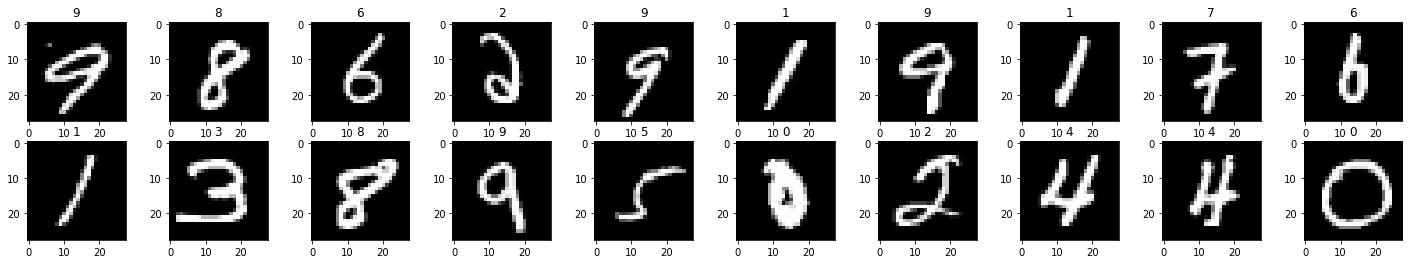

In [5]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 4))

for i in np.arange(20):
  ax = fig.add_subplot(2 , 10, i+1)
  plt.imshow(img_convert(images[i]))
  ax.set_title(labels[i].item())

In [6]:
class Classifier(nn.Module):
  def __init__(self, D_in, H1, H2, D_out):
    super().__init__()
    self.linear1 = nn.Linear(D_in, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, D_out)
  
  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x

In [7]:
model = Classifier(784, 125, 65, 10 ) # (input, N_layer1, N_layer2, N_output)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [9]:
epochs = 12
running_loss_history = []
running_currects_history = []
val_running_loss_history = []
val_running_corrents_history = []

for e in range(epochs):
  running_loss = 0.0
  running_currects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  for inputs, labels in training_loader:
    inputs = inputs.view(inputs.shape[0], -1)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs, 1)
    running_currects += torch.sum(preds == labels.data)
    running_loss += loss.item()
  else:
    with torch.no_grad():
       for val_inputs, val_labels in validation_loader:
         val_inputs = val_inputs.view(val_inputs.shape[0], -1)
         val_outputs = model(val_inputs)
         val_loss = criterion(val_outputs, val_labels)

         _, val_preds = torch.max(val_outputs, 1)
         val_running_corrects += torch.sum(val_preds == val_labels.data)
         val_running_loss += val_loss.item()

    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_currects.float()/len(training_loader)
    running_loss_history.append(epoch_loss)
    running_currects_history.append(epoch_acc)

    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_corrects.float()/len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrents_history.append(val_epoch_acc)
    print('epoch: ', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format((epoch_loss), epoch_acc.item()))
    print('validation loss: {:.4f}, val acc: {:.4f} '.format((val_epoch_loss), val_epoch_acc.item()))

epoch:  1
training loss: 0.4466, acc 86.9450 
validation loss: 0.2549, val acc: 92.2833 
epoch:  2
training loss: 0.2190, acc 93.4117 
validation loss: 0.1668, val acc: 95.0350 
epoch:  3
training loss: 0.1603, acc 95.1483 
validation loss: 0.1245, val acc: 96.3800 
epoch:  4
training loss: 0.1290, acc 96.0217 
validation loss: 0.1047, val acc: 96.8333 
epoch:  5
training loss: 0.1032, acc 96.8067 
validation loss: 0.0927, val acc: 97.1200 
epoch:  6
training loss: 0.0926, acc 97.1067 
validation loss: 0.0774, val acc: 97.5450 
epoch:  7
training loss: 0.0810, acc 97.3850 
validation loss: 0.0831, val acc: 97.3900 
epoch:  8
training loss: 0.0699, acc 97.7883 
validation loss: 0.0573, val acc: 98.1833 
epoch:  9
training loss: 0.0629, acc 97.9733 
validation loss: 0.0643, val acc: 97.8767 
epoch:  10
training loss: 0.0582, acc 98.0683 
validation loss: 0.0516, val acc: 98.2433 
epoch:  11
training loss: 0.0521, acc 98.2833 
validation loss: 0.0438, val acc: 98.5867 
epoch:  12
training

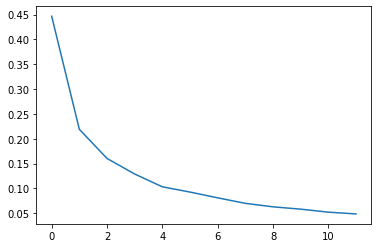

In [10]:
plt.plot(running_loss_history, label = 'training loss')

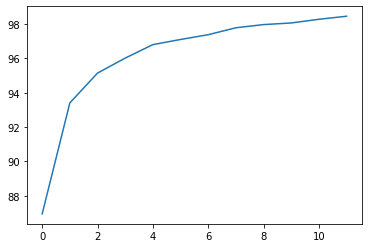

In [11]:
plt.plot(running_currects_history, label= 'training acc')

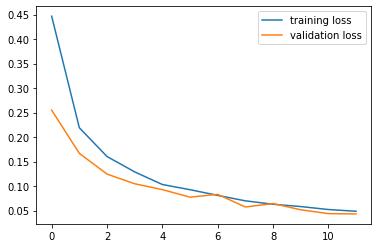

In [12]:
plt.plot(running_loss_history, label = 'training loss')
plt.plot(val_running_loss_history, label= 'validation loss')
plt.legend()zz

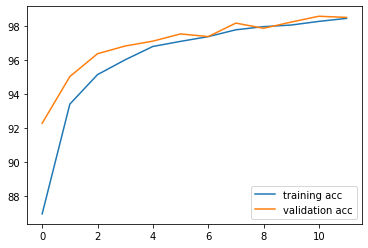

In [14]:
plt.plot(running_currects_history, label = 'training acc')
plt.plot(val_running_corrents_history, label= 'validation acc')
plt.legend()

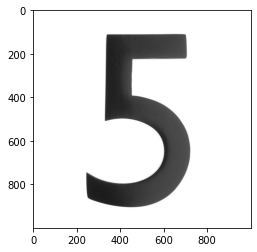

In [27]:
import requests
from PIL import Image
url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream=True)
# print(response)
img = Image.open(response.raw)
plt.imshow(img)



In [23]:
!pip install pillow==4.0.0

     |████████████████████████████████| 11.1 MB 4.6 MB/s 
     |████████████████████████████████| 112 kB 50.6 MB/s 
  Created wheel for pillow: filename=Pillow-4.0.0-cp37-cp37m-linux_x86_64.whl size=1007451 sha256=b389948fc5b94d9e3972056c28afc8989a579dc1796fb0fa0ad88f05af86414f
  Stored in directory: /root/.cache/pip/wheels/ec/1e/24/dbc5e4964ea99cad93230a9013d934fb5adc322c3102f69e45
  Created wheel for olefile: filename=olefile-0.46-py2.py3-none-any.whl size=35432 sha256=3bd0a5f5c3e90392a6b41e3ea39089a219bb9ef1d3304b31f84749ff3b01d8ad
  Stored in directory: /root/.cache/pip/wheels/84/53/e6/37d90ccb3ad1a3ca98d2b17107e9fda401a7c541ea1eb6a65a
Successfully built pillow olefile
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency co

In [ ]:
# !pip install 

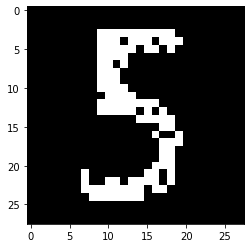

In [28]:
import PIL.ImageOps
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transform(img)
plt.imshow(img_convert(img)) 

In [29]:
input = img.view(img.shape[0], -1)
output = model(input)
_, pred = torch.max(output, 1)
print(pred.item())

5


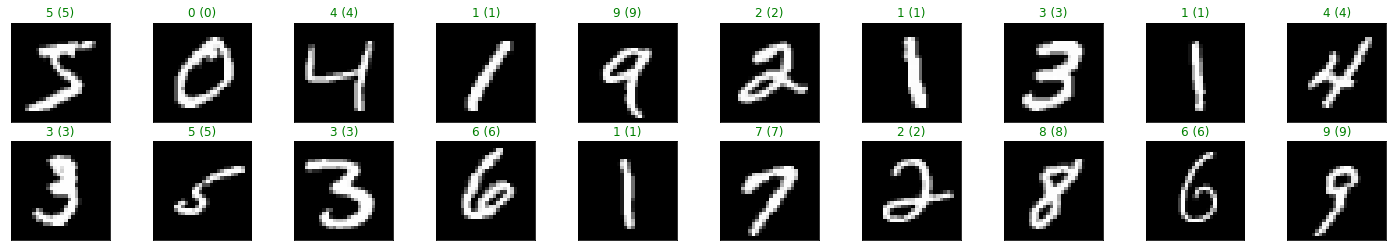

In [34]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
imagesPic = images.view(images.shape[0], -1)
output = model(imagesPic)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for i in np.arange(20):
  ax = fig.add_subplot(2 , 10, i+1, xticks=[], yticks=[])
  plt.imshow(img_convert(images[i]))
  ax.set_title('{} ({})'.format(str(preds[i].item()), str(labels[i].item())), color = ('green' if preds[i]==labels[i] else 'red'))